In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:


X_train = pd.read_csv('Dataset/X_train_100.csv')
y_train = pd.read_csv('Dataset/y_train_100.csv').iloc[:, 0]
X_test = pd.read_csv('Dataset/X_test.csv')
y_test = pd.read_csv('Dataset/y_test.csv').iloc[:, 0]

In [3]:
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.int32)
y_test_np = y_test.values.astype(np.int32)

print(" Data converted to neural network format")
print(f"X_train shape: {X_train_np.shape}")
print(f"X_test shape: {X_test_np.shape}")
print(f"y_train shape: {y_train_np.shape}")
print(f"y_test shape: {y_test_np.shape}")

 Data converted to neural network format
X_train shape: (235700, 20)
X_test shape: (37792, 20)
y_train shape: (235700,)
y_test shape: (37792,)


In [4]:
n_features = X_train_np.shape[1]
n_classes = len(np.unique(y_train_np))

print(f" Deep Neural Network dimensions:")
print(f"Input features: {n_features}")
print(f"Output classes: {n_classes}")
print(f"Training samples: {X_train_np.shape[0]:,}")
print(f"Test samples: {X_test_np.shape[0]:,}")

 Deep Neural Network dimensions:
Input features: 20
Output classes: 5
Training samples: 235,700
Test samples: 37,792


---

## Build Deep Neural Network Model

In [5]:
dnn_model = Sequential([

    Dense(512, activation='relu', input_shape=(n_features,), name='hidden_1'),
    BatchNormalization(),
    Dropout(0.4),


    Dense(256, activation='relu', name='hidden_2'),
    BatchNormalization(),
    Dropout(0.4),


    Dense(128, activation='relu', name='hidden_3'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(64, activation='relu', name='hidden_4'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', name='hidden_5'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(n_classes, activation='softmax', name='output')
])

In [6]:
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_5 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,445 (740.02 KB)

 Trainable params: 187,461 (732.27 KB)

 Non-trainable params: 1,984 (7.75 KB)

---

## Compile Model

In [7]:
dnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=7,
        min_lr=1e-7,
        verbose=1
    )
]

In [9]:

train_start_time = time.time()

In [10]:
history = dnn_model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=100,
    batch_size=512,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8600 - loss: 0.4252 - val_accuracy: 0.9728 - val_loss: 0.0983 - learning_rate: 0.0010
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9779 - loss: 0.0812 - val_accuracy: 0.9722 - val_loss: 0.0959 - learning_rate: 0.0010
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838 - loss: 0.0606 - val_accuracy: 0.9819 - val_loss: 0.0605 - learning_rate: 0.0010
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9855 - loss: 0.0524 - val_accuracy: 0.9791 - val_loss: 0.0675 - learning_rate: 0.0010
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0489 - val_accuracy: 0.9825 - val_loss: 0.0615 - learning_rate: 0.0010
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0456 - val_accuracy: 0.9827 - val_loss: 0.0573 - learning_rate: 0.0010
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 

In [11]:
train_end_time = time.time()
training_time = train_end_time - train_start_time

print(f"\n Training completed in {training_time:.2f} seconds")


 Training completed in 255.18 seconds


In [12]:
print(" Calculating training accuracy...")
train_pred_start = time.time()

y_train_pred_proba = dnn_model.predict(X_train_np, verbose=0)
y_train_pred = np.argmax(y_train_pred_proba, axis=1)

train_pred_end = time.time()
train_pred_time = train_pred_end - train_pred_start

training_accuracy = accuracy_score(y_train_np, y_train_pred)

print(f" Training prediction completed in {train_pred_time:.2f} seconds")
print(f" Training Accuracy: {training_accuracy:.4f} ({training_accuracy*100:.2f}%)")

 Calculating training accuracy...
 Training prediction completed in 16.76 seconds
 Training Accuracy: 0.9991 (99.91%)


In [13]:
print(" Making predictions on test set...")
test_start_time = time.time()

y_pred_proba = dnn_model.predict(X_test_np, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

test_end_time = time.time()
testing_time = test_end_time - test_start_time

print(f" Testing completed in {testing_time:.2f} seconds")

 Making predictions on test set...
 Testing completed in 2.29 seconds


In [14]:
test_accuracy = accuracy_score(y_test_np, y_pred)

print(f" DNN Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

 DNN Test Accuracy: 0.9966 (99.66%)


---

## Detailed Performance Metrics

In [15]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, y_pred, average='weighted')
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train_np, y_train_pred, average='weighted')

print("📊 DETAILED DNN PERFORMANCE:")
print("="*40)
print("TRAINING SET:")
print(f"Accuracy:  {training_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")
print()
print("TEST SET:")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print()
print("TIMING:")
print(f"Training time: {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")
print("="*40)

📊 DETAILED DNN PERFORMANCE:
TRAINING SET:
Accuracy:  0.9991
Precision: 0.9991
Recall:    0.9991
F1-Score:  0.9991

TEST SET:
Accuracy:  0.9966
Precision: 0.9973
Recall:    0.9966
F1-Score:  0.9968

TIMING:
Training time: 255.18 seconds
Testing time: 2.29 seconds


---

## Classification Report

In [16]:
print(classification_report(y_test_np, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.99      1.00      1.00      3497
           2       0.87      0.96      0.91       298
           3       0.32      0.94      0.48        16
           4       1.00      1.00      1.00     20203

    accuracy                           1.00     37792
   macro avg       0.84      0.98      0.88     37792
weighted avg       1.00      1.00      1.00     37792



---

## DNN Training History Visualization

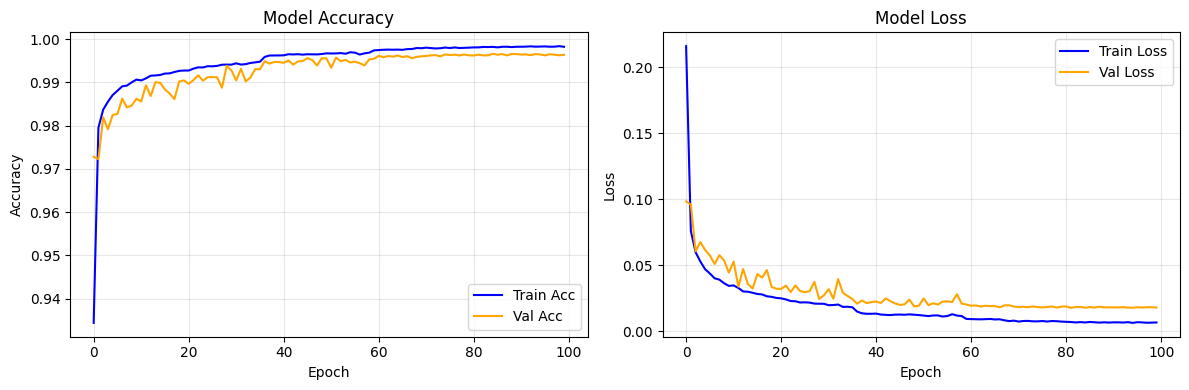

📈 Training completed after 100 epochs
🎯 Final training accuracy: 0.9982
🎯 Final validation accuracy: 0.9964
📉 Final training loss: 0.0065
📉 Final validation loss: 0.0178


In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 Training completed after {len(history.history['accuracy'])} epochs")
print(f"🎯 Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"🎯 Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"📉 Final training loss: {history.history['loss'][-1]:.4f}")
print(f"📉 Final validation loss: {history.history['val_loss'][-1]:.4f}")

---

## Final DNN Summary

In [18]:
print("📋 DEEP NEURAL NETWORK FINAL SUMMARY:")
print("="*55)
print(f"Architecture: 5 hidden layers (512→256→128→64→32)")
print(f"Total parameters: {dnn_model.count_params():,}")
print(f"Training time: {training_time:.2f}s")
print(f"Training accuracy: {training_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Accuracy gap: {(training_accuracy-test_accuracy)*100:.2f}%")
print(f"Status: {'CHAMPION! 🏆' if test_accuracy > 0.9985 else 'CHALLENGER 💪'}")
print("="*55)


📋 DEEP NEURAL NETWORK FINAL SUMMARY:
Architecture: 5 hidden layers (512→256→128→64→32)
Total parameters: 189,445
Training time: 255.18s
Training accuracy: 0.9991
Test accuracy: 0.9966
Accuracy gap: 0.25%
Status: CHALLENGER 💪
